no music counts:  105


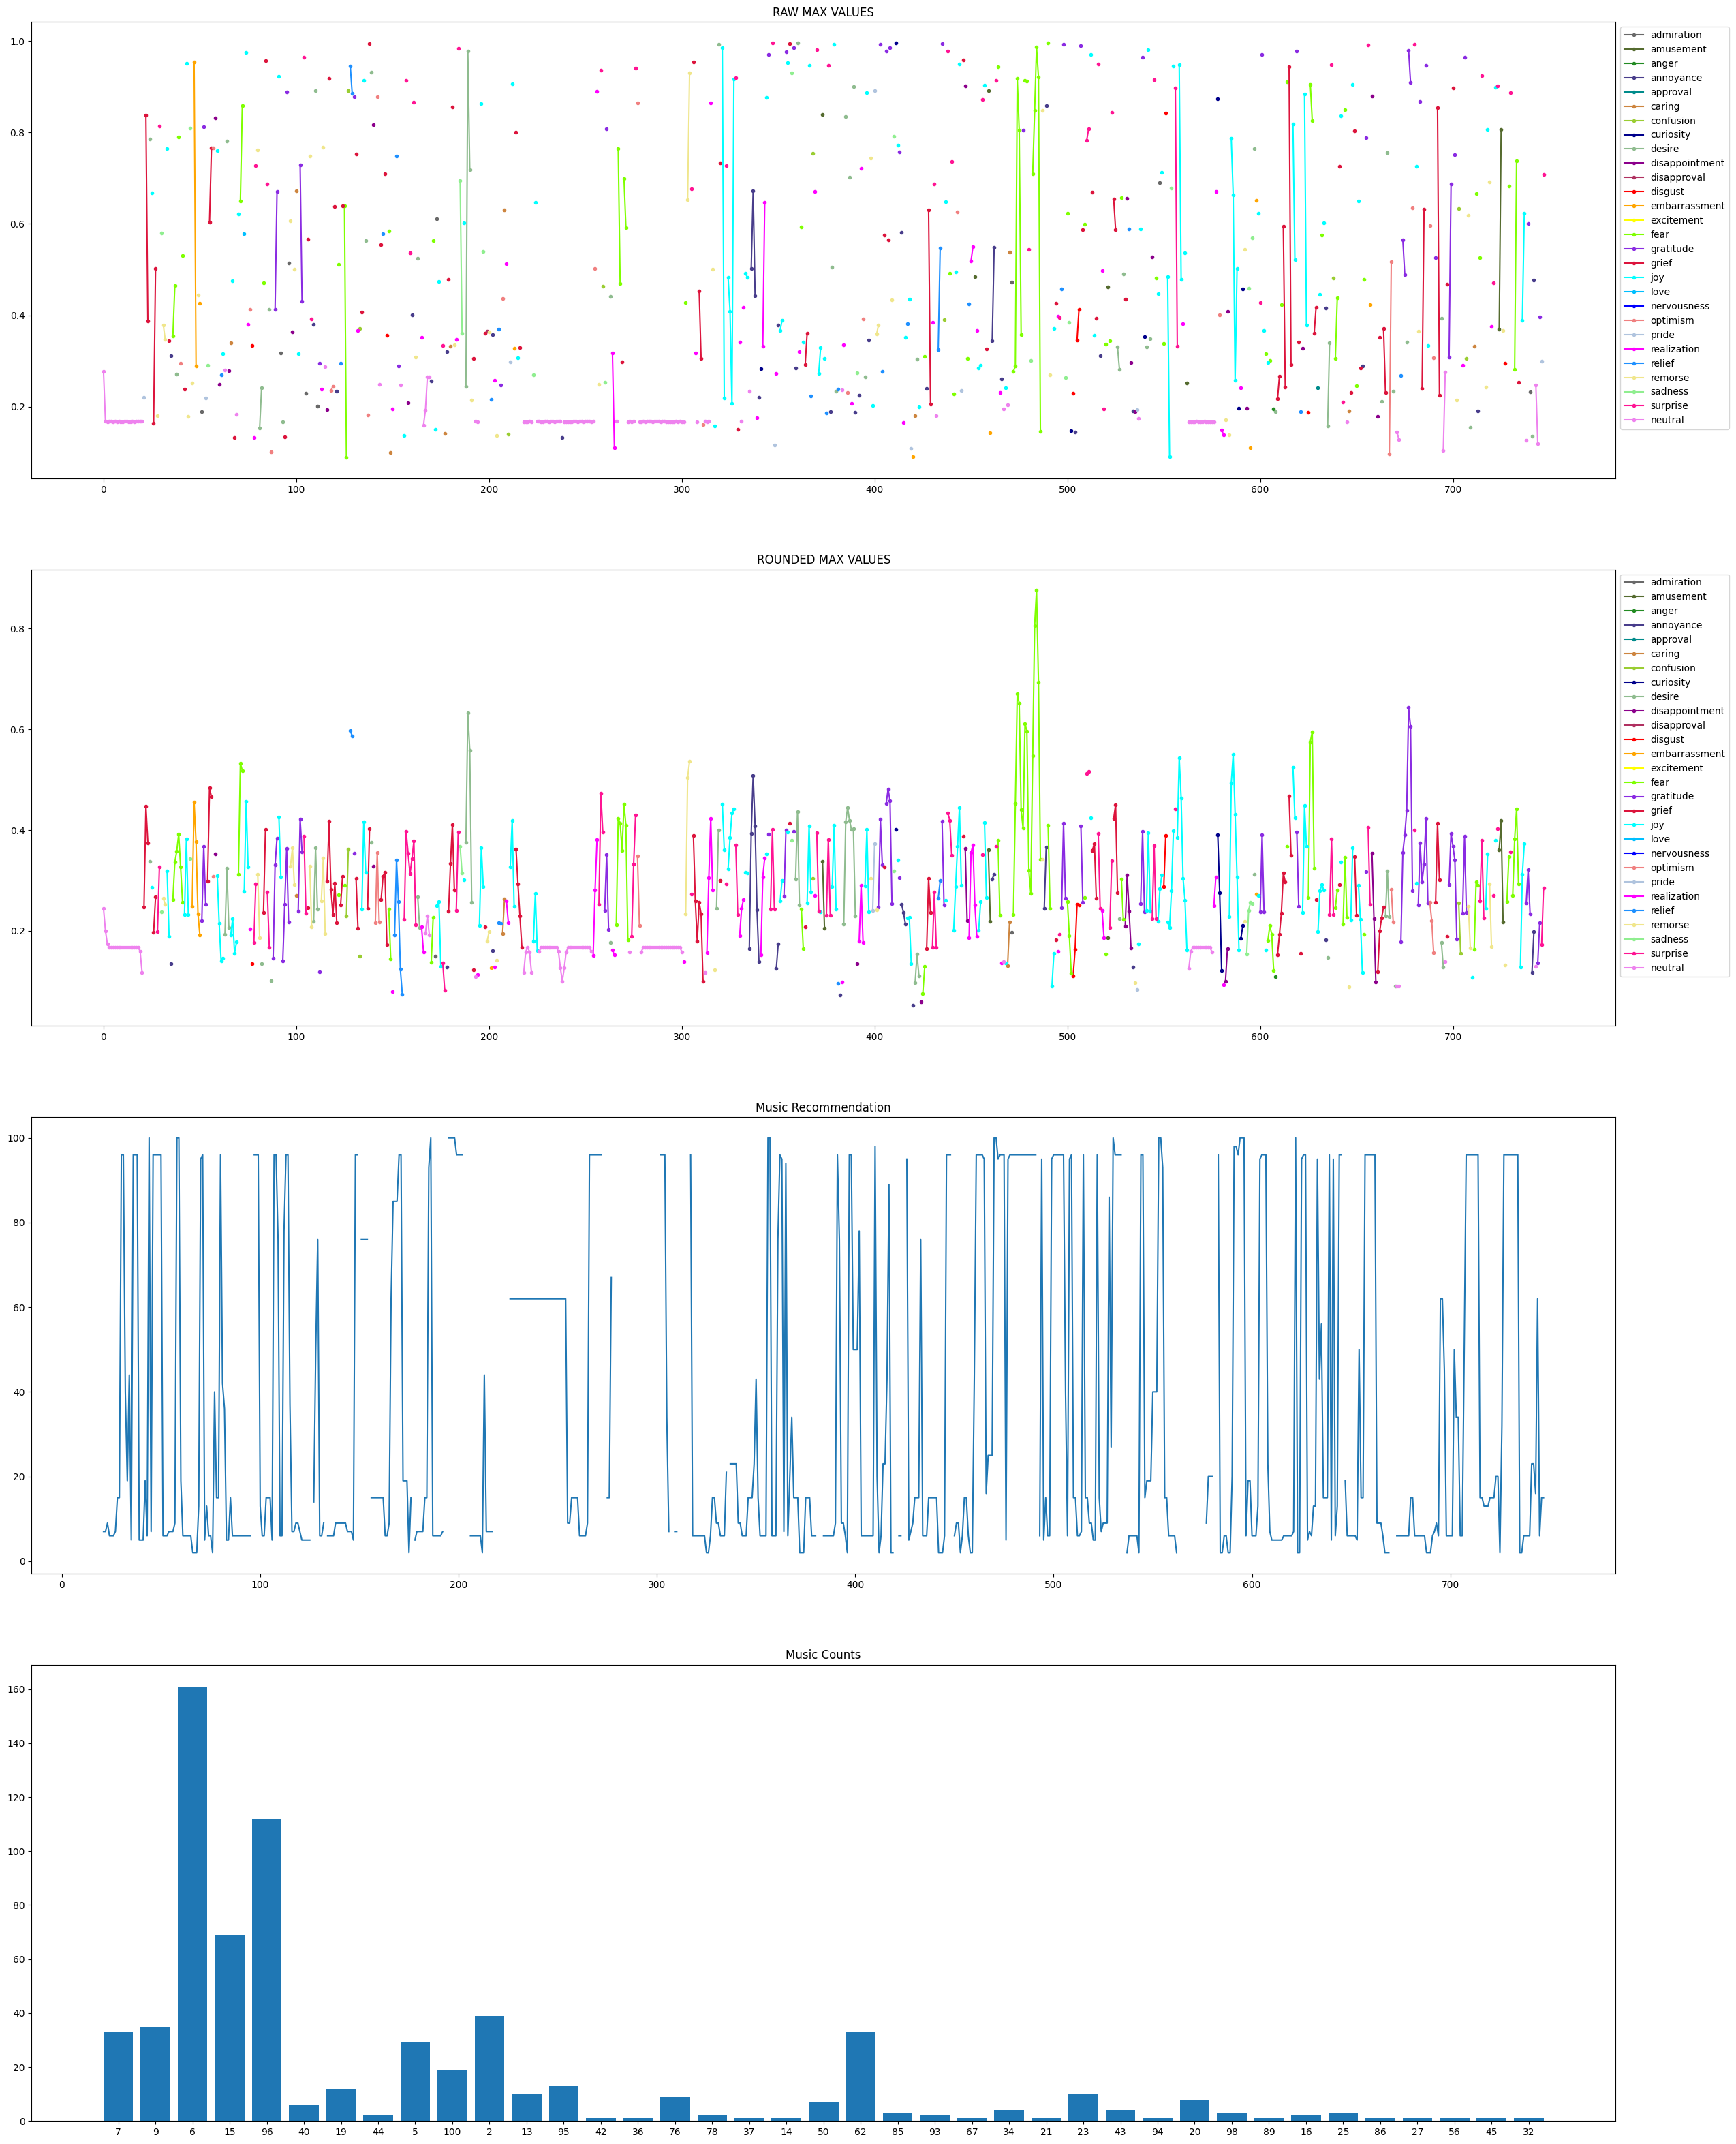

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import music_recommend
import json
from book_analysis import EMOTION, get_raw_values, get_rounded_values, data_to_json, transpose

COLOR = {'admiration': '#696969', 'amusement': '#556b2f', 'anger': '#228b22', 'annoyance': '#483d8b', 'approval': '#008b8b', 'caring': '#cd853f', 'confusion': '#9acd32', 'curiosity': '#00008b', 'desire': '#8fbc8f', 'disappointment': '#8b008b', 'disapproval': '#b03060', 'disgust': '#ff0000', 'embarrassment': '#ffa500', 'excitement': '#ffff00', 'fear': '#7fff00', 'gratitude': '#8a2be2', 'grief': '#dc143c', 'joy': '#00ffff', 'love': '#00bfff', 'nervousness': '#0000ff', 'optimism': '#f08080', 'pride': '#b0c4de', 'realization': '#ff00ff', 'relief': '#1e90ff', 'remorse': '#f0e68c', 'sadness': '#90ee90', 'surprise': '#ff1493', 'neutral': '#ee82ee'}

file = '5.json'
raw, raw_max, cfi, length = get_raw_values('raw/' + file)
rounded, rounded_max = get_rounded_values(raw)
emotions = transpose(rounded)

# music = music_recommend.get_musics(emotions, length)

# result = data_to_json(cfi, emotions, None, None, music)

# with open('result/' + file, 'w+', encoding='utf-8') as f:
    # f.write(json.dumps({'data':result}, ensure_ascii=False))

# for e in ['curiosity', 'desire', 'neutral']:
#     plt.figure(figsize=(30,10))
#     plt.title(e)
#     plt.plot(raw[e], '-', label = e + '_raw')
#     l = [x if x != 0 else np.nan for x in rounded[e]]
#     plt.plot(l, '-', label = e + '_rounded')
#     plt.legend(bbox_to_anchor=(1,1))
#     plt.show()

plt.figure(figsize=(30,40))
plt.subplot(4, 1, 1)
plt.title('RAW MAX VALUES')
for E in EMOTION:
    l = [val if E == raw_max[idx] else np.nan for idx, val in enumerate(raw[E])]
    #l = raw[E]
    plt.plot(l, '.-', label = E, color=COLOR[E])
plt.legend(bbox_to_anchor=(1,1))

plt.subplot(4, 1, 2)
plt.title('ROUNDED MAX VALUES')
for E in EMOTION:
    l = [val if E == rounded_max[idx] else np.nan for idx, val in enumerate(rounded[E])]
    #l = rounded[E]
    plt.plot(l, '.-', label = E, color=COLOR[E])
plt.legend(bbox_to_anchor=(1,1))


with open('result/' + file, 'r', encoding='utf-8') as p:
    jsn = json.load(p)
    music = [i['music'] for i in jsn['data']]

# print(music)
print('no music counts: ', music.count(''))

music_count = dict()
for i, m in enumerate(music):
    # if m == '':
    #     music[i] = np.nan
    # else:
    music_count[m] = music_count.get(m, 0) + 1    

music_count.pop('')

music = [np.nan if m == '' else int(m) for m in music]

plt.subplot(4, 1, 3)
plt.title('Music Recommendation')
plt.plot(music, '-')

plt.subplot(4, 1, 4)
plt.title('Music Counts')
plt.bar(music_count.keys(), music_count.values())
plt.show()

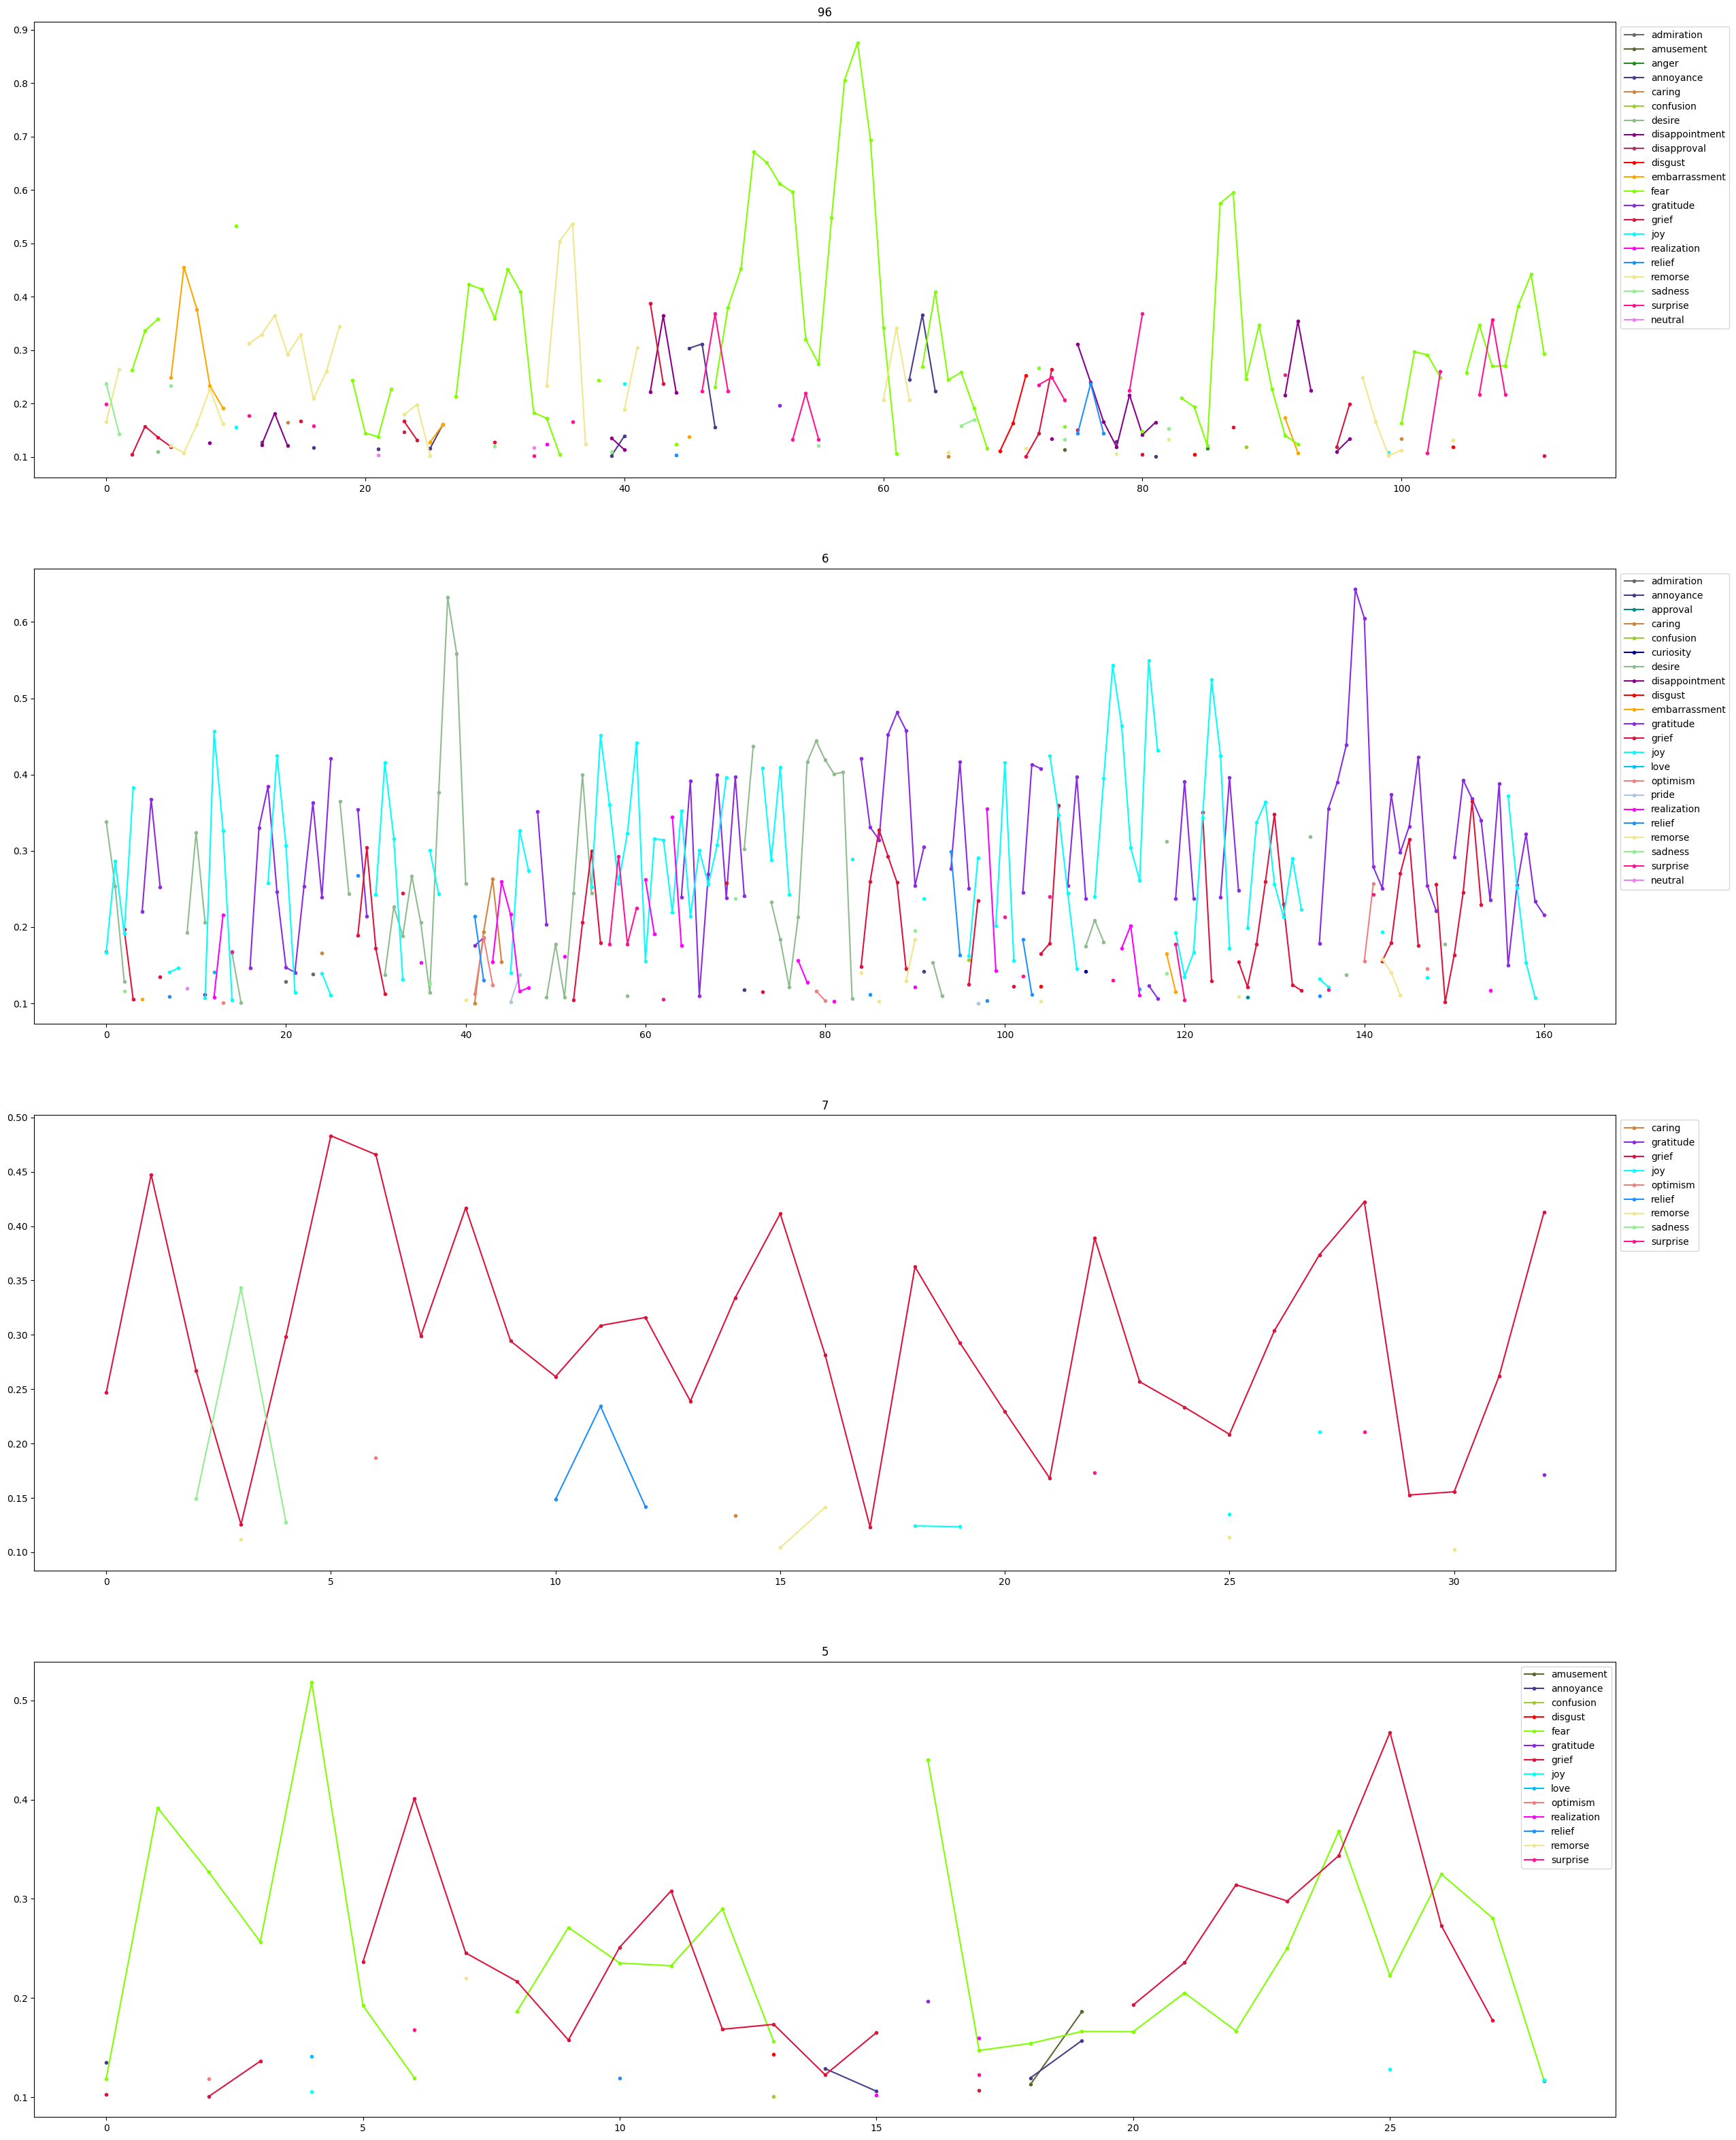

In [85]:
import json
import os
import numpy as np
import time
import matplotlib.pyplot as plt
import music_recommend

indices = [96, 6, 7, 5]
indices_count = len(indices)

plt.figure(figsize=(30, 10 * indices_count))

for i, id in enumerate(indices):
    temp = [e for m, e in zip(music, emotions) if m == id]
    plt.subplot(indices_count, 1, i + 1)
    plt.title(str(id))
    for E in EMOTION:
        l = [e[E] if E in e else np.nan for e in temp]
        if l.count(np.nan) != len(temp):
            plt.plot(l, '.-', label = E, color=COLOR[E])
    plt.legend(bbox_to_anchor=(1,1))

plt.show()


In [86]:
import numpy as np
import music_recommend
import json

with open('result/' + file, "r", encoding='utf-8') as f:
    jsn = json.load(f)

cfi = [i['cfi'] for i in jsn['data']]
music = [i['music'] for i in jsn['data']]

last_cfi = cfi[0]
temp = cfi[0]
last_music = music[0]
count = 1
for c, m in zip(cfi[1:], music[1:]):
    if m == last_music:
        count += 1
    else:
        if not last_music == '':
            if last_cfi == temp:
                print('Range :', last_cfi, ' | Length :', count)
            else:
                print('Range :', last_cfi, '~', temp, ' | Length :', count)
            print('Music :', last_music, ' | ', ' | '.join(music_recommend.get_info(last_music).values()))
            print('-' * 100)
        last_cfi = c
        last_music = m
        count = 1
    temp = c

if not m == '':    
    if last_cfi == temp:
        print('Range :', last_cfi, ' | Length :', count)
    else:
        print('Range :', last_cfi, '~', temp, ' | Length :', count)
    print('Music  :', last_music, ' | ', ' | '.join(music_recommend.get_info(last_music).values()))

Range : /6/6!/4/2[pgepubid00002]/4 ~ /6/6!/4/2[pgepubid00002]/6  | Length : 2
Music : 7  |  Prelude, op.28-15(Rain Drop) | 쇼팽 _ 전주곡 15번 내림 라장조 작품번호 28-15 '빗방울' | medium swing | 보통빠르기로 | FRESH | 콘트라베이스(CONTRABASS)+피아노(PIANO)+드럼(DRUM)
----------------------------------------------------------------------------------------------------
Range : /6/6!/4/2[pgepubid00002]/8  | Length : 1
Music : 9  |  The Swan(Le Cygne) | 백조 | slow swing | 보통빠르기로 | BRIGHT | 콘트라베이스(CONTRABASS)+피아노(PIANO)+드럼(DRUM)
----------------------------------------------------------------------------------------------------
Range : /6/6!/4/2[pgepubid00002]/10 ~ /6/6!/4/2[pgepubid00002]/14  | Length : 3
Music : 6  |  Prelude, op.28-15(Rain Drop) | 쇼팽 _ 전주곡 15번 내림 라장조 작품번호 28-15 '빗방울' | waltz | 보통빠르기로 | BRIGHT | 콘트라베이스(CONTRABASS)+피아노(PIANO)+드럼(DRUM)
----------------------------------------------------------------------------------------------------
Range : /6/6!/4/2[pgepubid00002]/16  | Length : 1
Music : 7  |  Prelude, op.

[ /6/28!/4/2[pgepubid00013]/22 | /6/28!/4/2[pgepubid00013]/24 | /6/28!/4/2[pgepubid00013]/26 | /6/28!/4/2[pgepubid00013]/28 | /6/28!/4/2[pgepubid00013]/30 | /6/28!/4/2[pgepubid00013]/32 ]
 Time, however, and the satisfaction I had that I was in no danger of being discovered by these people, began to wear off my uneasiness about them; and I began to live just in the same composed manner as before, only with this difference, that I used more caution, and kept my eyes more about me than I did before, lest I should happen to be seen by any of them; and particularly, I was more cautious of firing my gun, lest any of them, being on the island, should happen to hear it. It was, therefore, a very good providence to me that I had furnished myself with a tame breed of goats, and that I had no need to hunt any more about the woods, or shoot at them; and if I did catch any of them after this, it was by traps and snares, as I had done before; so that for two years after this I believe I never fired

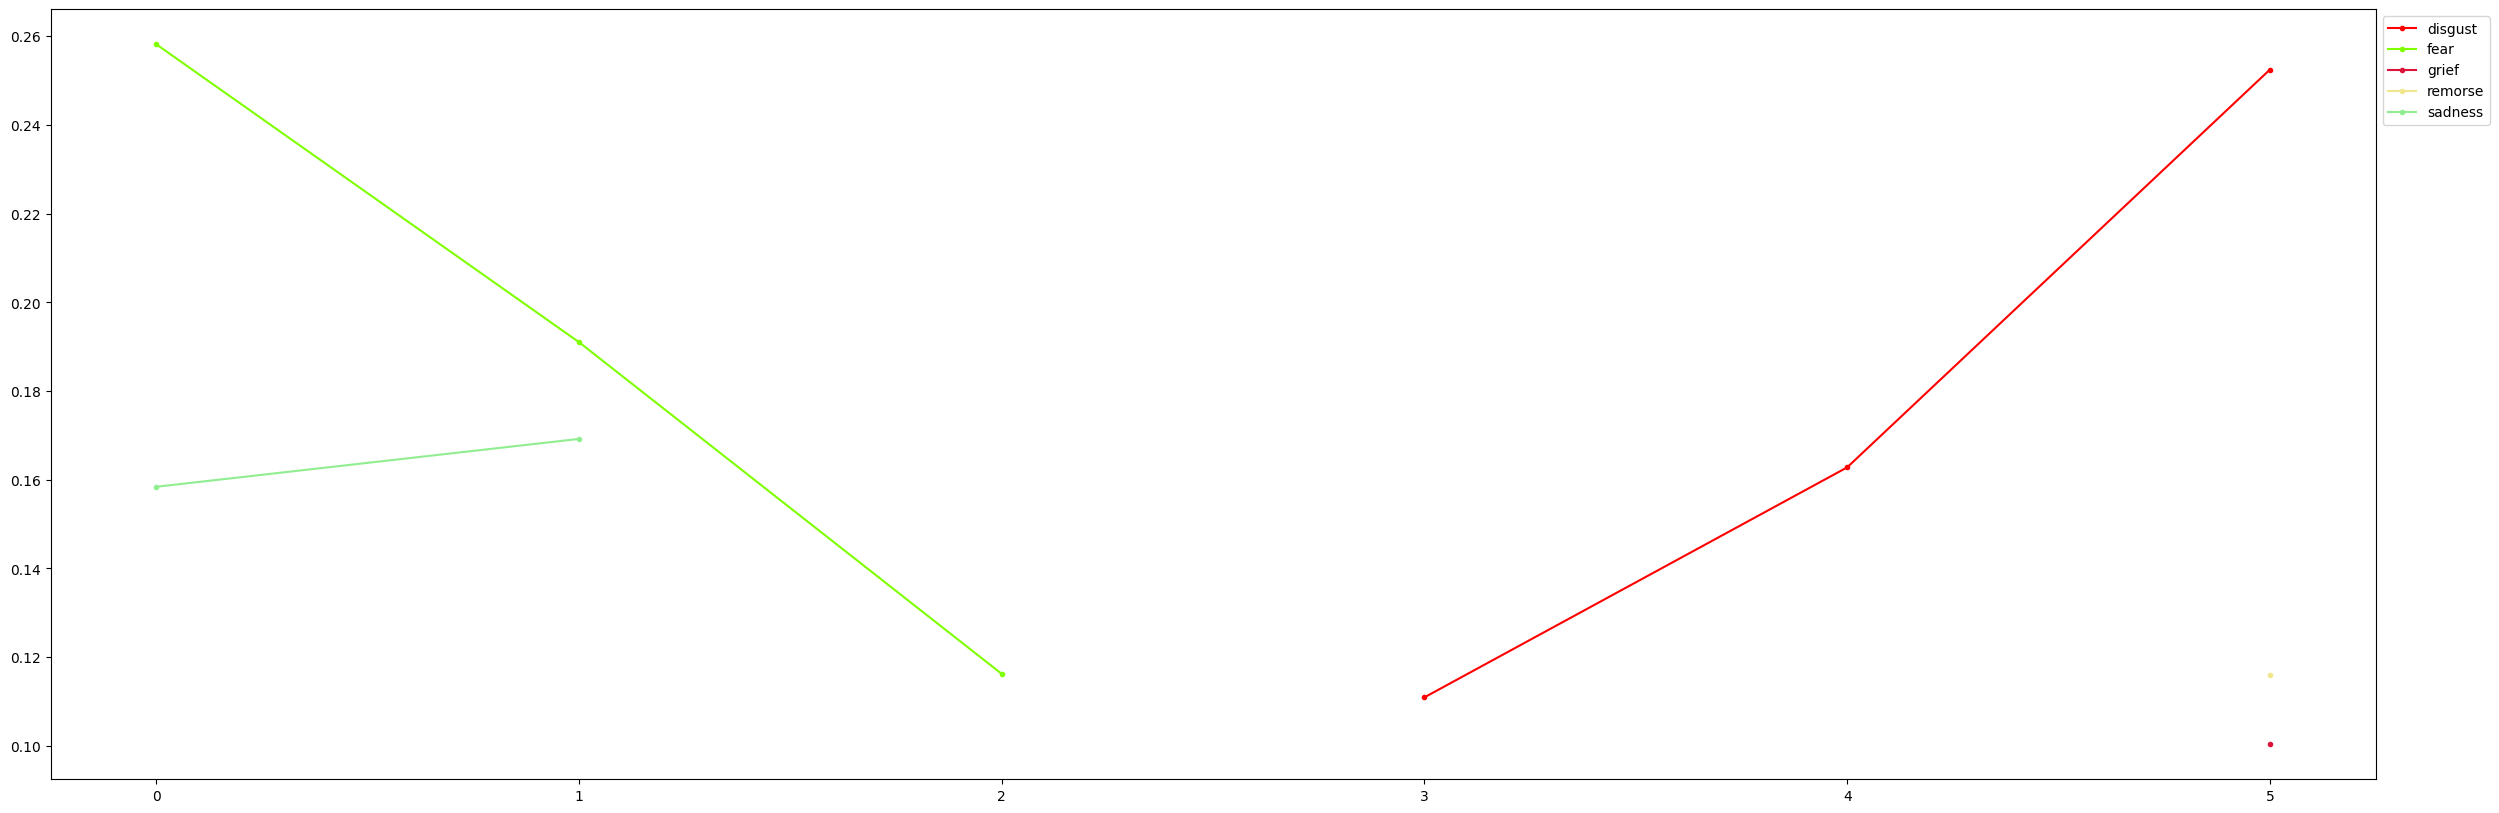

In [89]:
import matplotlib.pyplot as plt
import json

r = "/6/28!/4/2[pgepubid00013]/22 ~ /6/28!/4/2[pgepubid00013]/32"
start = r.split(' ~ ')[0]
end = r.split(' ~ ')[1]

contents = []
with open('raw/' + file, "r", encoding='utf-8') as f:
    data = json.load(f)['data']
    cfi = [d['cfi'] for d in data]
    a1 = cfi.index(start)
    a2 = cfi.index(end) + 1
    print('[', ' | '.join(cfi[a1:a2]), ']')
    print(' '.join([d['content'] for d in data[a1:a2]]))

with open('result/' + file, "r", encoding='utf-8') as f:
    data = json.load(f)['data']
    emotion = [d['emotion'] for d in data[a1:a2]]
    print([d['music'] for d in data[a1:a2]])
#data = [{"cfi": "/6/12!/4/2[pgepubid00006]/60", "emotion": {"surprise": 0.12117453598420636}, "color": "#000000", "weather": "rain", "music": "15"}, {"cfi": "/6/12!/4/2[pgepubid00006]/62", "emotion": {"excitement": 0.10559015704959517, "surprise": 0.21346736230879756}, "color": "#000000", "weather": "rain", "music": "15"}, {"cfi": "/6/12!/4/2[pgepubid00006]/64", "emotion": {"surprise": 0.3518194511499773}, "color": "#000000", "weather": "rain", "music": "15"}, {"cfi": "/6/12!/4/2[pgepubid00006]/66", "emotion": {"surprise": 0.4363652050985044}, "color": "#000000", "weather": "rain", "music": "15"}, {"cfi": "/6/12!/4/2[pgepubid00006]/68", "emotion": {"joy": 0.189170673099063, "surprise": 0.4282676633176177}, "color": "#000000", "weather": "rain", "music": "15"}]

print(emotion)

plt.figure(figsize=(30, 10))
for E in EMOTION:
    l = [e[E] if E in e else np.nan for e in emotion]
    if l.count(np.nan) != len(emotion):
        plt.plot(l, '.-', label = E, color=COLOR[E])
plt.legend(bbox_to_anchor=(1,1))
plt.show()